In [10]:
import pandas as pd

# Load the CSV file
file_path = '2022_trace_0to4_data.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())


   timestamp       traceid      service      rpc_id rpctype        um  \
0     162789  T_3993656788  S_107255660   0.1.3.2.1      mc  MS_48385   
1     162795  T_3993656788  S_107255660   0.1.3.9.6      mc  MS_48385   
2     162795  T_3993656788  S_107255660   0.1.3.9.8      mc  MS_48385   
3     162815  T_3993656788  S_107255660  0.1.3.24.4      mc  MS_48385   
4     162818  T_3993656788  S_107255660    0.1.3.31      mc  MS_48385   

        uminstanceid   interface        dm      dminstanceid   rt  
0  MS_48385_POD_1110  YNBqgUmng2  MS_11641   MS_11641_POD_80  0.0  
1  MS_48385_POD_1110  1Z7M5jqIte  MS_14304  MS_14304_POD_432  1.0  
2  MS_48385_POD_1110  1Z7M5jqIte  MS_14304  MS_14304_POD_315  1.0  
3  MS_48385_POD_1110  S-KUCz-6uF  MS_28467  MS_28467_POD_452  0.0  
4  MS_48385_POD_1110  KXjPX3PwVB  MS_28467  MS_28467_POD_452  0.0  


In [11]:
# Filter relevant columns
data_filtered = data[['traceid', 'um']]

# Group by traceid and upstream microservice (um) and count the number of calls
call_counts = data_filtered.groupby(['traceid', 'um']).size().reset_index(name='call_count')

# Display the aggregated call counts
print(call_counts)


          traceid           um  call_count
0    T_1343914647     MS_22714           1
1    T_1343914647     MS_32745          50
2    T_1343914647     MS_36498           5
3    T_1343914647     MS_61658          14
4    T_1343914647      MS_8329           9
5    T_1343914647      UNKNOWN           1
6   T_24435603720     MS_16519           3
7   T_24435603720     MS_20116           7
8   T_24435603720     MS_21249          25
9   T_24435603720     MS_31667          15
10  T_24435603720     MS_40770          28
11  T_24435603720      UNKNOWN           1
12  T_24435603720         USER           1
13  T_24875334601     MS_44698           1
14  T_24875334601     MS_72712          79
15  T_24975122372     MS_30554           2
16  T_24975122372     MS_52115          68
17  T_24975122372     MS_57925           9
18  T_24975122372  UNAVAILABLE           1
19   T_3993656788     MS_48385          79
20   T_3993656788      UNKNOWN           1


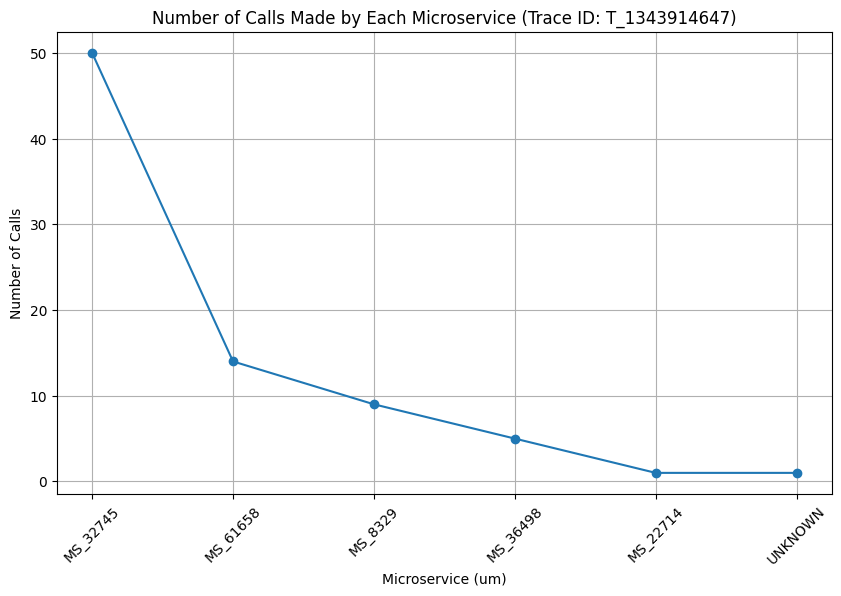

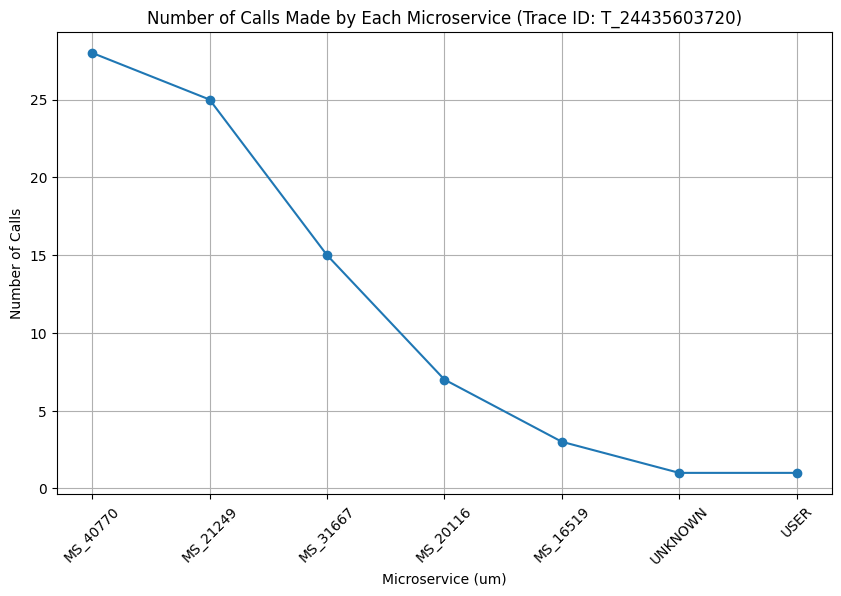

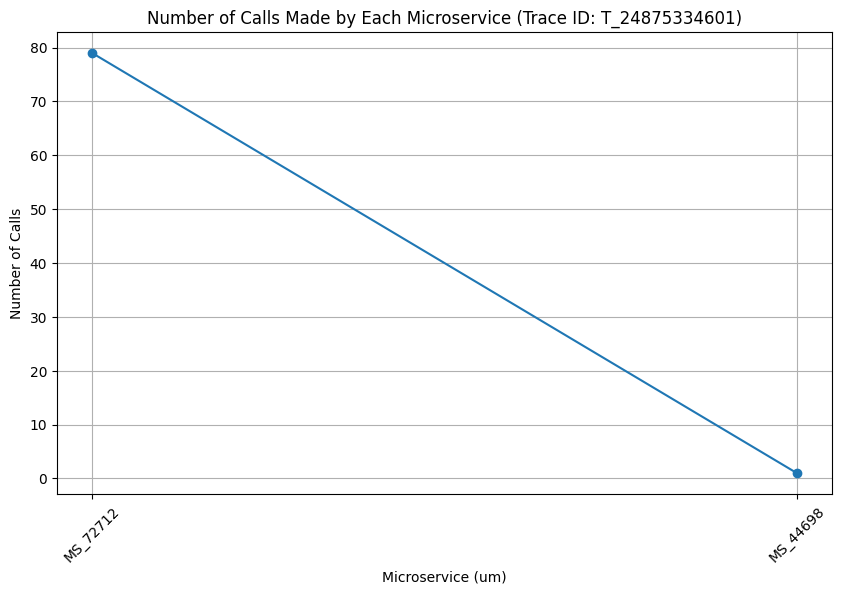

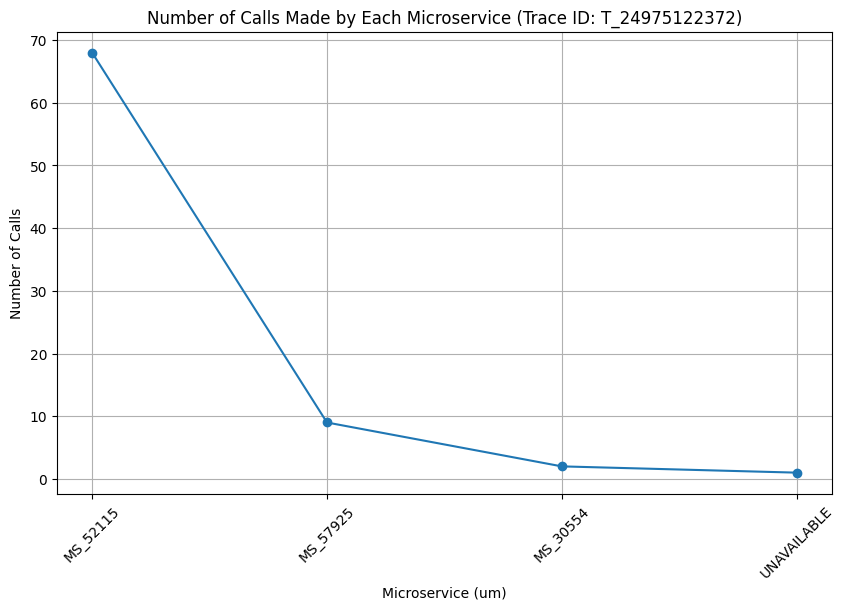

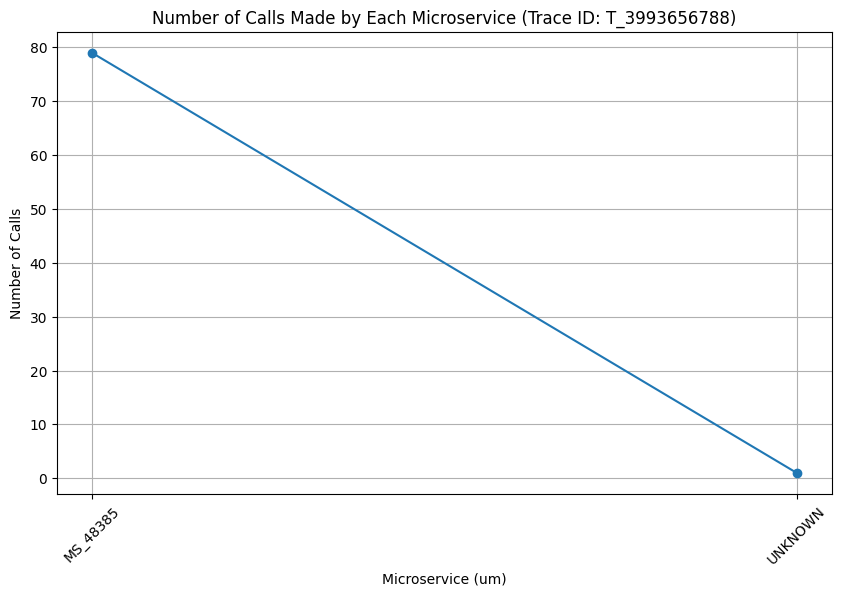

In [12]:
import matplotlib.pyplot as plt

# Get unique trace IDs
trace_ids = call_counts['traceid'].unique()

# Plot line graph for each trace ID
for trace_id in trace_ids:
    trace_data = call_counts[call_counts['traceid'] == trace_id]
    
    trace_data = trace_data.sort_values(by='call_count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.plot(trace_data['um'], trace_data['call_count'], marker='o', linestyle='-')
    plt.title(f'Number of Calls Made by Each Microservice (Trace ID: {trace_id})')
    plt.xlabel('Microservice (um)')
    plt.ylabel('Number of Calls')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


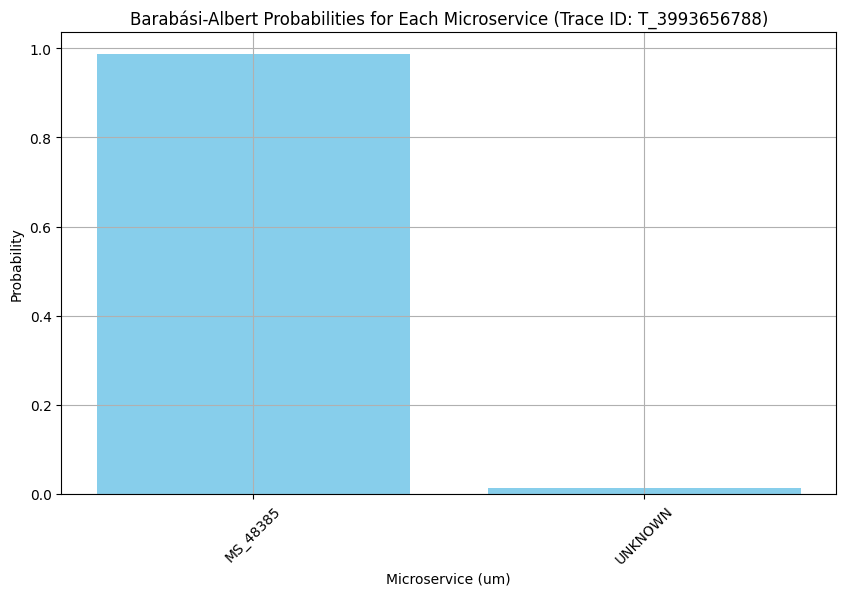

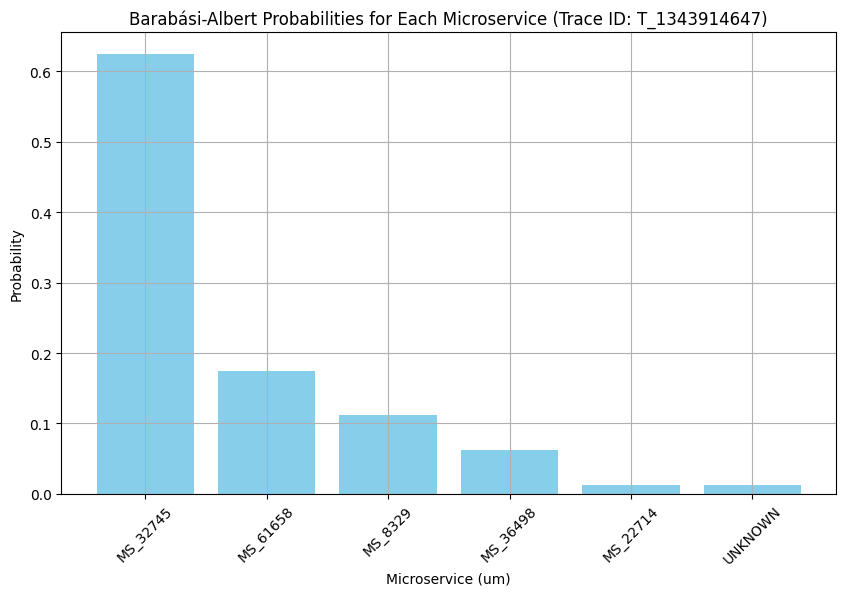

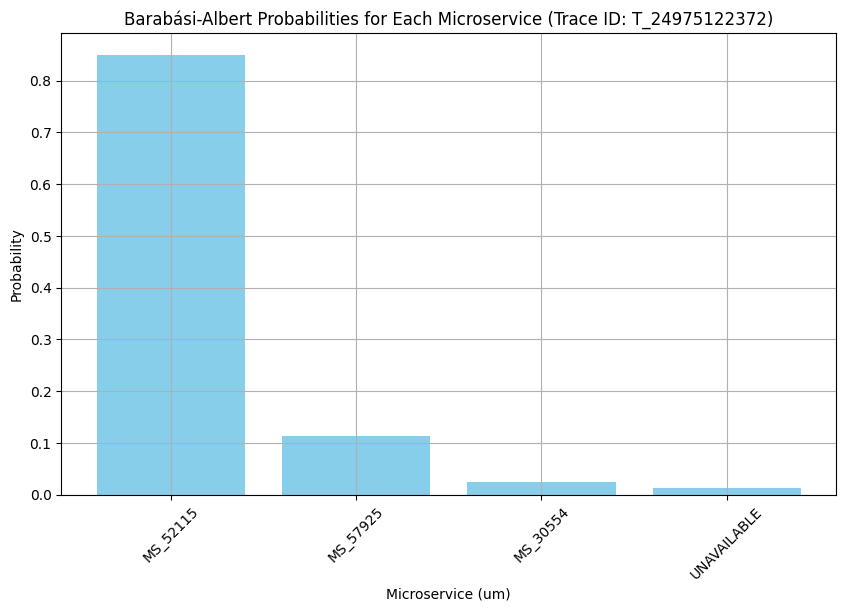

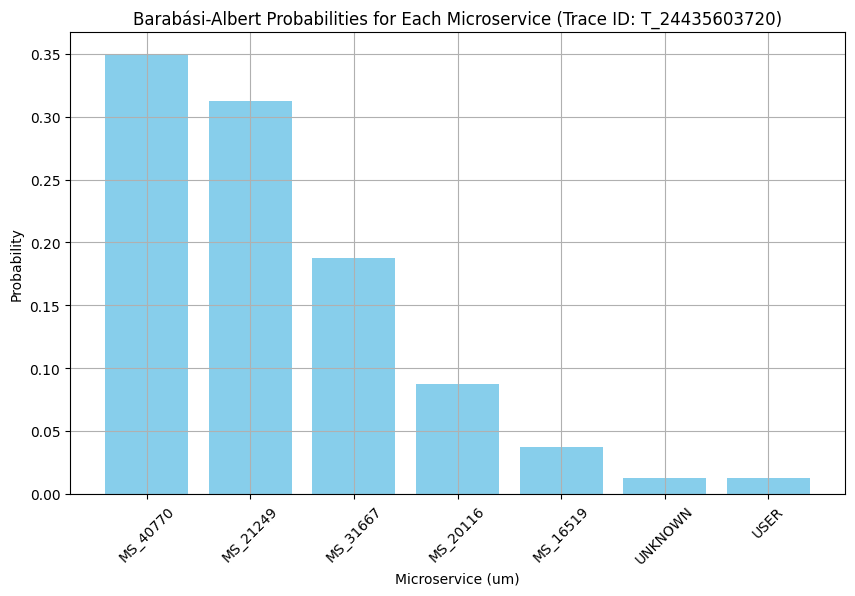

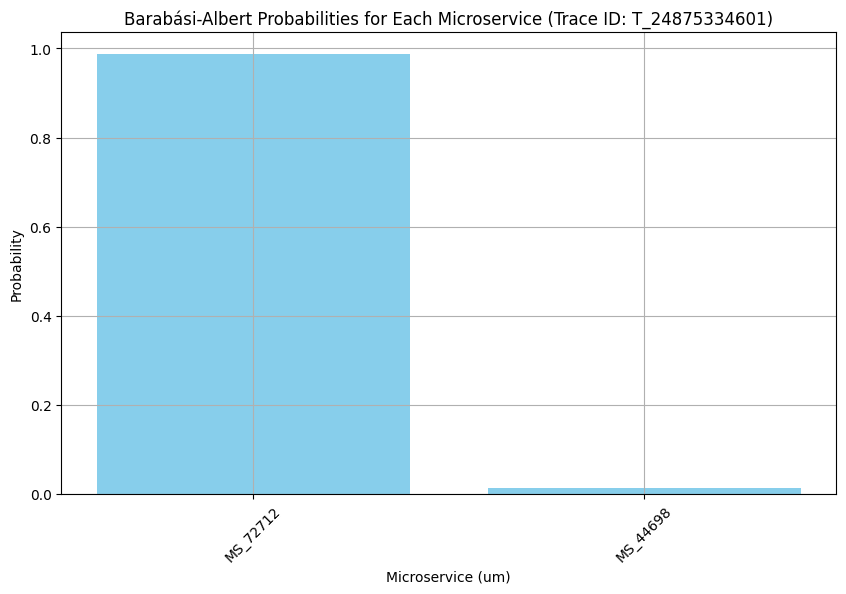

Barabási-Albert probabilities exported to probabilities.csv.


In [13]:
# Filter relevant columns
data_filtered = data[['traceid', 'um']]

# Get unique trace IDs
trace_ids = data_filtered['traceid'].unique()

# Prepare an empty DataFrame to store probabilities
all_probabilities = pd.DataFrame()

# Process each trace ID separately
for trace_id in trace_ids:
    # Filter data for the current trace ID
    trace_data = data_filtered[data_filtered['traceid'] == trace_id]
    
    # Group by upstream microservice (um) and count the number of calls
    call_counts = trace_data.groupby('um').size().reset_index(name='call_count')
    
    # Sort call_counts by call_count in descending order
    call_counts = call_counts.sort_values(by='call_count', ascending=False)
    
    # Calculate the degree of each upstream microservice (number of outgoing calls)
    degrees = trace_data['um'].value_counts().reset_index()
    degrees.columns = ['um', 'degree']
    
    # Calculate the total degree sum
    total_degree = degrees['degree'].sum()
    
    # Calculate the probability for each microservice
    degrees['probability'] = degrees['degree'] / total_degree
    
    # Append probabilities to the all_probabilities DataFrame
    degrees['traceid'] = trace_id
    all_probabilities = pd.concat([all_probabilities, degrees[['traceid', 'um', 'probability']]], ignore_index=True)
    
    # Plot the probabilities
    plt.figure(figsize=(10, 6))
    plt.bar(degrees['um'], degrees['probability'], color='skyblue')
    plt.title(f'Barabási-Albert Probabilities for Each Microservice (Trace ID: {trace_id})')
    plt.xlabel('Microservice (um)')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Save all_probabilities to probabilities.csv
output_file = 'probabilities.csv'
all_probabilities.to_csv(output_file, index=False)
print(f'Barabási-Albert probabilities exported to {output_file}.')
